<a href="https://colab.research.google.com/github/Radhika003/python-mini-projects/blob/main/House_size_Vs_House_price.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import random

In [ ]:
#introducion to ML
#used Libraries - random, numpy,pandas

In [3]:
#Terms in machine learning
#1.collection : data used for training, validating,and testing the Machine learning model
#2.Feature : independent variable or input variable used to predict the target variable
#3.Target(Y) : dependent variable -output- we want to predict -
#4.Training data: subset of dataset used to train the model
#5.Testing data: subset of dataset used to validate the trained model
#6.Model: mathematical representation of relationship between feature and target
#7.supervised learning (sl): Training the data based on labelled data/ model learns from know/labelled data
#8.regression: method to predict continuous values for a model -supervised learning
#9.Overfitting : when a model learns from training data too well,includes noise-peform poorly new data
#10.underfitting: model is too simpler and does not capture pattern in data

##cateories in machine learning:
#1.supervised learning:
#   Model learns from labeled data - i/o pairs
#   Example: Linear registration, Decision trees, Random forest, SVM
#   Best use case so far : House price prediction based on previous/historical data

# 2. Unsupervised learning :
# Model finds new patterns in unlabeled data without predefined data/lables
#   Example : Clustering (k means), PCA
#   Use case : Customer segmentation in marketing

# 3. Reinforcement learning :
#   Model learns by interacting with environment and receiving the regards or penalties
#   Example : Deep learning,AlphaGo...
#  Best use case: self car driving vehicles ,self Learning AI bots,SLAM

In [4]:
# Example : Predicting the House price - Random dataset - generated

# Steps :
# 1. Generate a random dataset
# 2. Train a ML model - linear registration
# 3. Evaluation the Model
# 4. Make prediction

In [5]:
import numpy as np
import pandas as pd
from matplotlib import pyplot as plt

In [16]:
#step1:Generate a random dataset
np.random.seed(42)#used to set same sequence of values for the random package
numSamples=100
size=np.random.randint(800,5000,numSamples)
bedrooms =np.random.randint(1,6,numSamples)
washrooms=np.random.randint(1,8,numSamples)
localityScore=np.random.randint(1,10,numSamples)
#Generate house prices with randomness
houseprice = (size* 3000) + (bedrooms *50000) + (washrooms * 30000) + (localityScore * 70000) + np.random.randint(-50000, 50000, numSamples)
#create a DataFrame
df=pd.DataFrame(
{
      'Size':size,
      'Bedrooms':bedrooms,
      'Washrooms':washrooms,
      'LocalityScore':localityScore,
      'Price':houseprice
}
)

In [17]:
df

,Size,Bedrooms,Washrooms,LocalityScore,Price
0,1660,5,2,9,5964758
1,4572,4,7,5,14517747
2,3892,5,7,8,12708752
3,1266,5,6,1,4304573
4,4244,3,2,5,13301101
...,...,...,...,...,...
95,1006,1,6,5,3591286
96,2284,3,5,1,7240450
97,1663,4,6,4,5620352
98,3590,1,3,5,11265069


In [20]:
#step: Train a ML model- linear regression
#package (installation) requirements
#pip install scikit-learn
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression

In [21]:
x = df[['Size','Bedrooms','Washrooms','LocalityScore']]
y = df['Price']

In [27]:
x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=0.2,random_state=42)

model = LinearRegression()
model.fit(x_train,y_train)

LinearRegression()

In [28]:
# Step 3 : Evaluate the model
# package Requirments :
# sklearn.metrics

from sklearn.metrics import mean_absolute_error,mean_squared_error
y_pred = model.predict(x_test)

MAE = mean_absolute_error(y_test,y_pred)
MSE = mean_squared_error(y_test,y_pred)
RMSE =np.sqrt(MSE)

print(f'Mean Absolute Error : {MAE}')
print(f'Mean Squarred Error : {MSE}')
print(f'Root Mean squarred Error : {RMSE}')

Mean Absolute Error : 25385.345481365337
Mean Squarred Error : 796791448.4323988
Root Mean squarred Error : 28227.494547557686


In [39]:
# Step 4 : Make a prediction
newHouse = np.array([[10000,10,10,10]])
predictedPrice = model.predict(newHouse)
print(f'The predictedPrice of new house is {predictedPrice[0]}')

The predictedPrice of new house is 31446796.67668341


/usr/local/lib/python3.11/dist-packages/sklearn/utils/validation.py:2739: UserWarning: X does not have valid feature names, but LinearRegression was fitted with feature names
  warnings.warn(


In [55]:
print(f'The predictedPrice of new house is {predictedPrice[0]}')

The predictedPrice of new house is 31446796.67668341


In [61]:
xsorted=np.sort(x,axis=0)
Ypred=model.predict(xsorted)

/usr/local/lib/python3.11/dist-packages/sklearn/utils/validation.py:2739: UserWarning: X does not have valid feature names, but LinearRegression was fitted with feature names
  warnings.warn(


<ipython-input-65-4fe840e147ae>:5: UserWarning: No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.
  plt.legend()


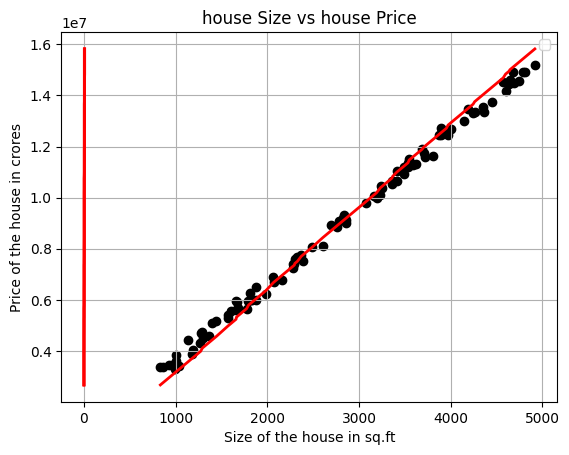

In [65]:
plt.scatter(df['Size'], df['Price'],color='black')
plt.plot(xsorted,Ypred,color='red',linewidth=2)
plt.xlabel ('Size of the house in sq.ft')
plt. ylabel ('Price of the house in crores')
plt.legend()
plt.grid(True)
plt.title ('house Size vs house Price')
plt. show()